# SECTION 04. 결측치 처리
# 타이타닉 생존율 에측 모형을 위한 데이터 파악
## 1. 결측치 개념

이번 절에서는 데이터 분석 맛보기로, 주어진 데이터를 이용해 생존율을 분석해보는 연습을 한다. 연령별, 성별, 보트 탑승객, 귀족 계급별 생존율을 살펴본다. 먼저 타이타닉 데이터를 가져온다. 이때 분석에 사용하지 않을 body, home.dest 열은 삭제한다.

In [2]:
try:
    import pandas as pd
except:
    !pip install pandas
    import pandas as pd

In [3]:
titanic_url = 'https://github.com/sehakflower/data/blob/main/titanic_1309.xlsx?raw=true'

titanic = pd.read_excel(titanic_url, sheet_name = 'total')
titanic_df = titanic.drop(['body', 'home.dest'], axis = 1)
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN


## 생존율 파악하기
연령별로 생존율이 어떠한지 파악해보자. cut 함수는 열의 값을 특정 기준을 나눌 때 사용한다. bins 옵션으로 나누는 구간을 정할 수 있으며 labels 옵션으로 구간 별 라벨을 설정할 수 있다. 구간으로 나눈 값을 'age_cat'이라는 새로운 열에 대입한다.

In [4]:
titanic_df['age_cat'] = pd.cut(titanic_df['age'],
                              bins = [0, 3, 7, 15, 30, 60, 100],
                              include_lowest = True,
                              labels = ['baby', 'children', 'teenage', 'young', 'adult', 'old'],
                              )
titanic_df.groupby('age_cat', observed = True).mean(numeric_only = True)

,pclass,survived,age,sibsp,parch,fare
age_cat,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309


결과를 보면 baby와 children의 생존율이 높다. 생존율을 승객 등급(pclass), 연령(age_cat), 성별(sex)에 따라 간단히 시각화하는 방법을 알아보자.

In [5]:
try:
    import seaborn as sns
except: 
    !pip install seaborn
    import seaborn as sns

%matplotlib inline
try:
    from matplotlib import pyplot as plt
except:
    !pip install matplotlib
    from matplotlib import pyplot as plt

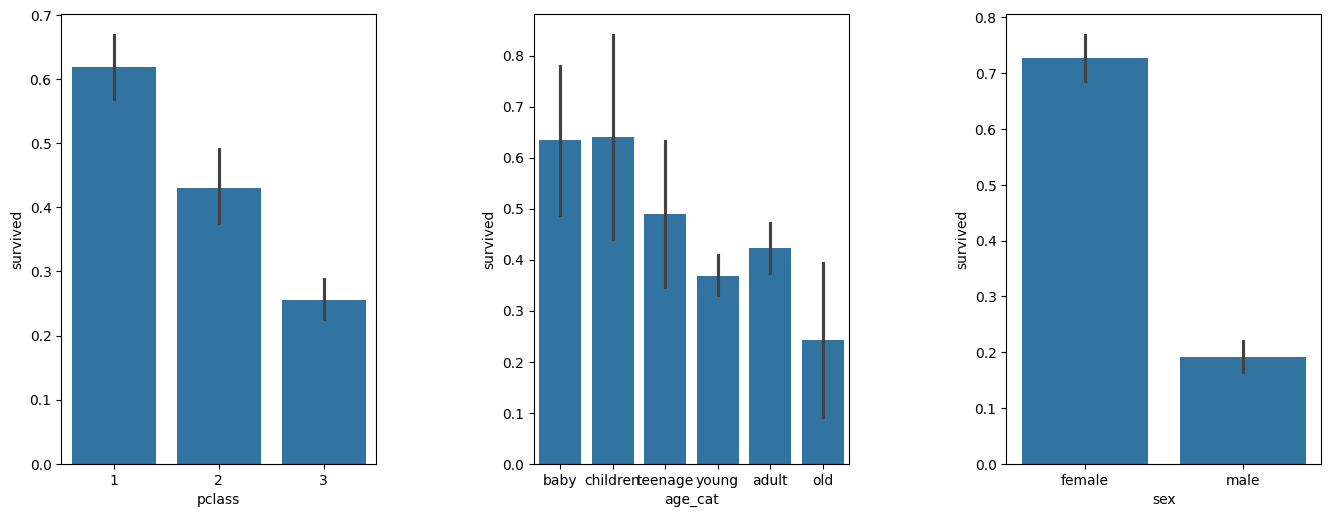

In [8]:
data = titanic_df
plt.figure(figsize = [14, 5])

plt.subplot(131) # 1행 3열중 1번
sns.barplot(x = 'pclass', y = 'survived', data = titanic_df)

plt.subplot(132)
sns.barplot(x = 'age_cat', y = 'survived', data = titanic_df)

plt.subplot(133)
sns.barplot(x = 'sex', y = 'survived', data = titanic_df)

# 서브플롯 사이 여백 조정
plt.subplots_adjust(top = 1, bottom = 0.1, left = 0.1, right = 1, hspace = 0.5, wspace = 0.5)
plt.show()

결과를 보면 1등급 승객, 유아, 여성의 생존율이 높다. 승객 등급별 데이터를 다시보자.

In [9]:
titanic_df.groupby(['pclass', 'sex']).mean(numeric_only = True)

survived        age     sibsp     parch        fare
pclass sex                                                        
1      female  0.965278  37.037594  0.555556  0.472222  109.412385
       male    0.340782  41.029250  0.340782  0.279330   69.888385
2      female  0.886792  27.499191  0.500000  0.650943   23.234827
       male    0.146199  30.815401  0.327485  0.192982   19.904946
3      female  0.490741  22.185307  0.791667  0.731481   15.324250
       male    0.152130  25.962273  0.470588  0.255578   12.415462

1등급 승객 중 여성의 생존율이 높다. 3등급 여성의 생존율의 1~2등급에 비해 낮고 남성은 2~3등급 간 차이가 없다.

## 보트 탑승 승객의 생존율 파악하기
보트 탑승 승객의 생존율을 파악해보자. 보트에 탑승한 승객만 추려서 boat_survivors 데이터 프레임에 저장하고 탑승하지 못한 승객은 nboat_survivors에 저장한 뒤 성별 생존율을 비교해보자.

In [10]:
boat_survivors = titanic_df[titanic_df['boat'].notnull()]
nboat_survivors = titanic_df[titanic_df['boat'].isnull()]

print(boat_survivors.groupby('sex')['survived'].mean())
print(nboat_survivors.groupby('sex')['survived'].mean())

sex
female    0.996865
male      0.952096
Name: survived, dtype: float64
sex
female    0.142857
male      0.002959
Name: survived, dtype: float64


비교 결과를 보면, 보트에 탑승하지 못한 승객의 생존율이 매우 낮으며 특히 남성의 생존율이 극히 낮다. 이를 그림으로 시각화한 결과를 보면 전반적으로 보트에 탔던 승객은 거의 생존했던 것을 확인할 수 있다.

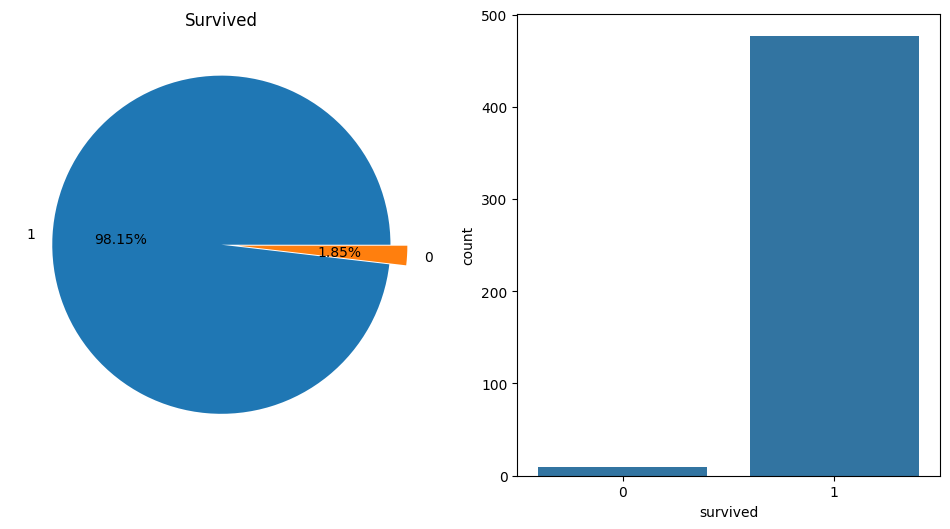

In [12]:
f, ax = plt.subplots(1, 2, figsize = (12, 6))

boat_survivors['survived'].value_counts().plot.pie(explode = [0, 0.1],
                                                   autopct = '%1.2f%%',
                                                   ax = ax[0]
                                                  )
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x = 'survived', data = boat_survivors, ax = ax[1])
plt.show()

## 귀족 계급의 생존율 파악하기
이번에는 귀족 계급의 생존율을 파악해본다. name 열의 호칭을 이용해 귀족 계급과 그렇지 않은 계급 간의 생존율을 비교한다.

In [13]:
conversion_special = lambda x : x.split(',')[1].split('.')[0].strip()
titanic_df['title'] = titanic_df['name'].map(conversion_special)
titanic_df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,young,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,teenage,Miss
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,Miss
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,young,Mr
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,young,Mr


In [15]:
titanic_df['title'] = titanic_df['title'].replace('Mlle', 'Miss')
titanic_df['title'] = titanic_df['title'].replace('Ms', 'Miss')
titanic_df['title'] = titanic_df['title'].replace('Mme', 'Mrs')

Special=['Lady', 'the Countess', 'Countess', 'Capt', 'Master', 'Col', 'Don', 'Dr', 'Major',
'Rev', 'Sir', 'Jonkheer', 'Dona']

for each in Special:
    titanic_df['title'] = titanic_df['title'].replace(each, 'Special')

print(titanic_df[['title', 'survived']].groupby(['title'], as_index = False).mean())

     title  survived
0     Miss  0.678030
1       Mr  0.162483
2      Mrs  0.787879
3  Special  0.466667


conversion_special을 통해 name열의 호칭을 전부 불러오고 Mlle, Ms는 Miss, Mme는 Mrs로 바꾸고 Special 리스트 변수에 있는 호칭은 모두 Special이란 값으로 새롭게 만든 title 열에 넣는다. 이후 각 title에 따라 생존율을 구한다. 결과를 보면, Special보다는 Mrs 혹은 Miss의 생존율이 더 높은 것을 알 수 있다. Special이면서 남성인 경우와 여성인 경우의 비교도 필요하다.

In [16]:
titanic_df.groupby(['sex', 'title']).mean(numeric_only = True)

pclass  survived        age     sibsp     parch       fare
sex    title                                                                
female Miss     2.337121  0.678030  21.824335  0.655303  0.496212  42.566747
       Mrs      1.934343  0.787879  36.918129  0.656566  0.828283  50.655366
       Special  1.000000  1.000000  42.250000  0.250000  0.000000  65.232300
male   Mr       2.381770  0.162483  32.252151  0.282695  0.159841  24.796185
       Special  2.290698  0.441860  18.007575  1.569767  1.023256  38.096026

Special인 경우 여성은 모두 생존한 경우로 나타났다. 생존율을 예측하는 모형을 구상할 때 변수 별로 생존율이 어떻게 다른지 미리 파악한 후 데이터 전처리 작업에 들어간다. 데이터의 전반적인 분포를 보면서 이상치를 제거하기도 하고 값의 측정 단위가 큰 차이가 나면 스케일링을 위한 로그화를 할 수 있다. 또는 변수의 변화율이 필요한 경우 차분화, 표준화, 정규화 등을 통해 데이터를 전처리한다.

데이터 전처리는 매우 성가신 과정이지만 좋은 모형에 적용되기 위해서는 매우 신중하게 작업해야 한다. 이제 예측 모형을 위한 데이터 전처리 과정을 실습해보자.